# Import functions and set defaults

In [1]:
%run 'psd_mc_functions.ipynb'

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os

Reading XAMS data from pickles...
Read data in 5.21 seconds


# Testing ground

## Energy selection

### What is the maximum energy?

In [2]:
d = xams_data['er']

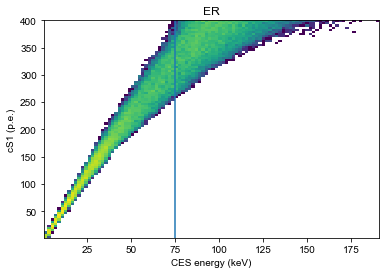

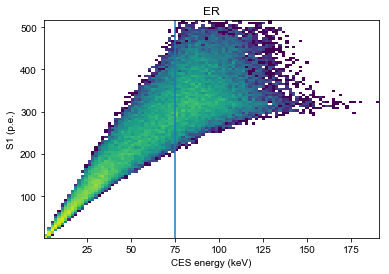

In [3]:
plt.hist2d(d['e_ces'], d['cs1'],bins=100, norm=LogNorm())
plt.xlabel('CES energy (keV)')
plt.ylabel('cS1 (p.e.)')
plt.axvline(75)
plt.title('ER')
plt.show()

plt.hist2d(d['e_ces'], d['s1'],bins=100, norm=LogNorm())
plt.xlabel('CES energy (keV)')
plt.ylabel('S1 (p.e.)')
plt.axvline(75)
plt.title('ER')
plt.show()

It looks like that in ER at high field, we can go up to 75 keV

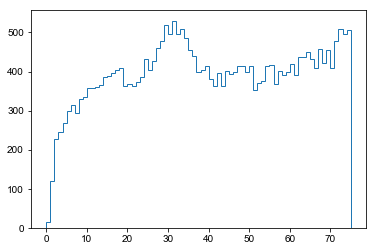

In [5]:
plt.hist(d['e_ces'], bins=75, range=(0, 75), histtype = 'step')
plt.show()

### Inspect data averages

In [6]:
e_bin_edges = np.array([0, 5, 10, 20, 30, 50, 70])
e_bin_centers = 0.5 * (e_bin_edges[1:] + e_bin_edges[:-1])
e_widths = 0.5 * np.diff(e_bin_edges)
wfs = []
for l, r in zip(e_bin_edges[:-1], e_bin_edges[1:]):
    wf, _ = real_s1_wv(dset = 'er', s1_min = 0, s1_max = np.inf, e_min = l, e_max = r)
    wfs.append(wf)

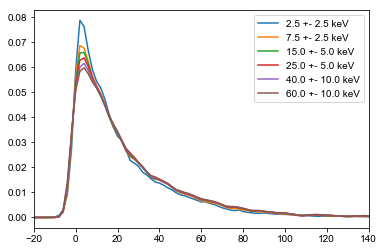

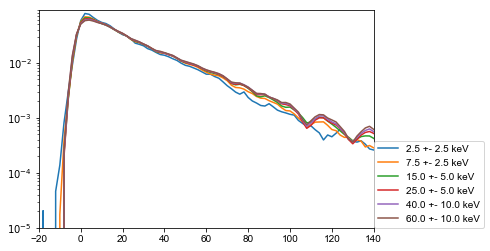

In [7]:
for wf, c, w in zip(wfs, e_bin_centers, e_widths):
    plt.plot(spe_ts, wf, label="%.1f +- %.1f keV" % (c, w))
    plt.xlim(-20, 140)
plt.legend()
plt.show()

for wf, c, w in zip(wfs, e_bin_centers, e_widths):
    plt.plot(spe_ts, wf, label="%.1f +- %.1f keV" % (c, w))
    plt.xlim(-20, 140)
plt.legend(loc=(1,0))
plt.yscale('log')
plt.ylim(1e-5, 0.09)
plt.show()


### Check if fit is OK

In [9]:
popt_er = { 'dset': 'er',
 'fs': 0.19,
 't1': 1.0,
 't3': 24.0,
 'tts': 2.0}

In [11]:
# Let us limit the computation time a bit
popt_er['n_photons'] = int(2e5)
popt_er['bootstrap_trials'] = 25
popt_er['neglect_systematic'] = True

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 30, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 's1_max': 100, 't_max': 125.0, 'bootstrap_trials': 25, 'e_max': inf, 'fs': 0.19, 't1': 1.0, 'e_min': 0, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


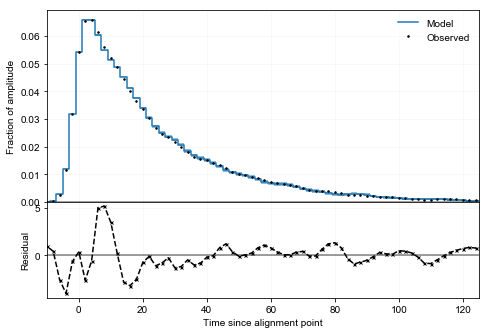

In [12]:
# Normal settings (no restriction on energy, with s1 30 - 100): agreement good
plot_model(plot_type = 1, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 0, 'bootstrap_trials': 25, 'e_max': 5, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


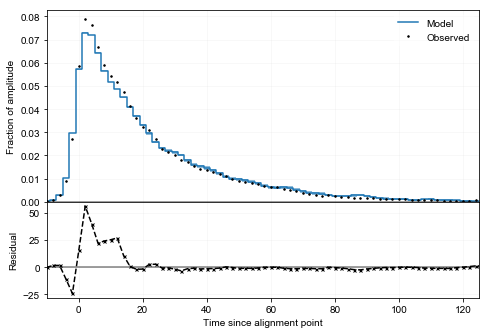

In [14]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 0, e_max = 5, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 5, 'bootstrap_trials': 25, 'e_max': 10, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


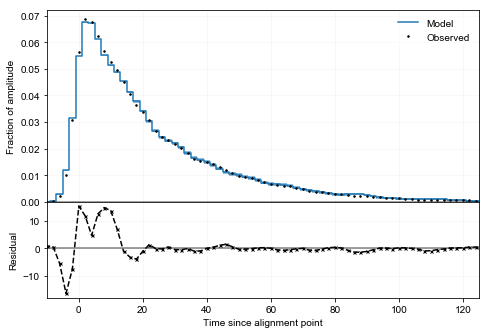

In [15]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 5, e_max = 10, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 10, 'bootstrap_trials': 25, 'e_max': 20, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


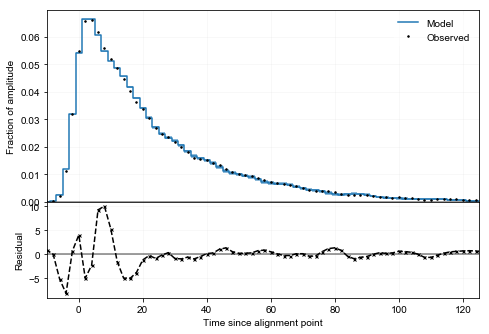

In [16]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 10, e_max = 20, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 20, 'bootstrap_trials': 25, 'e_max': 30, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


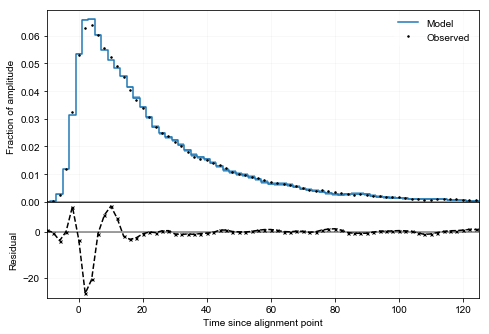

In [17]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 20, e_max = 30, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 30, 'bootstrap_trials': 25, 'e_max': 50, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


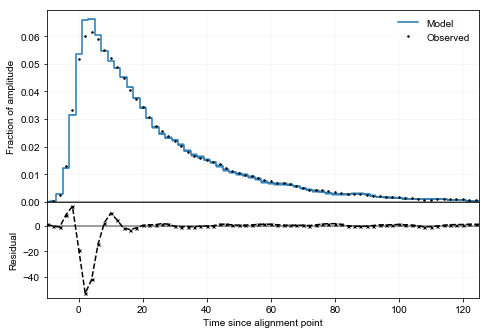

In [18]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 30, e_max = 50, **popt_er)

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 't_min': -10.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 200000, 't3': 24.0, 'tts': 2.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 50, 'bootstrap_trials': 25, 'e_max': 70, 'fs': 0.19, 't1': 1.0, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 'stored_stat': True}


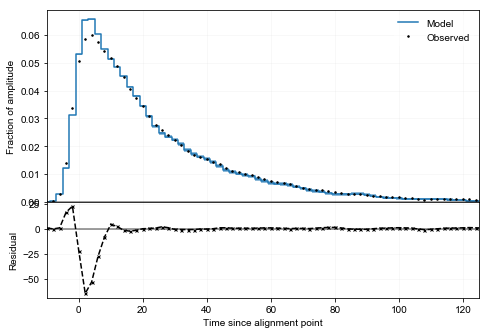

In [22]:
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 50, e_max = 70, **popt_er)

In [20]:
popt_er['fs']

0.19

{'s1_model': 'two_exp', 'eta': 0.0, 'f_r': 0.0, 'error_pct': 0.0, 'aft': 0.28, 's1_min': 0, 'tts': 2.0, 'neglect_systematic': True, 'error_offset': 0.0001, 'n_photons': 10000, 't3': 24.0, 't1': 1.0, 'stored_stat_value': None, 'fs_r': 0.2, 't_max': 125.0, 'e_min': 0, 'bootstrap_trials': 5, 'e_max': 5, 'fs': 0.23, 's1_max': inf, 'tr': 15, 'neglect_statistical': False, 'dset': 'er', 't_min': -10.0, 'stored_stat': True}


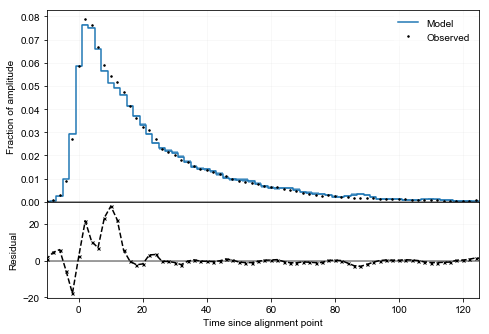

In [63]:
p = deepcopy(popt_er)
p['fs'] = 0.23
p['n_photons'] = int(1e4)
p['bootstrap_trials'] = 5
plot_model(plot_type = 1, s1_min = 0, s1_max = np.inf, e_min = 0, e_max = 5, **p)

### Check simulated wfs

More or less, this is a check if the simulation does anything from the energy range...

In [74]:
popt_er

{'bootstrap_trials': 25,
 'dset': 'er',
 'fs': 0.19,
 'n_photons': 200000,
 'neglect_systematic': True,
 't1': 1.0,
 't3': 24.0,
 'tts': 2.0}

In [75]:
e_bin_edges = np.array([0, 5, 10, 20, 30, 50, 70])
e_bin_centers = 0.5 * (e_bin_edges[1:] + e_bin_edges[:-1])
e_widths = 0.5 * np.diff(e_bin_edges)
wfs = []
for l, r in zip(e_bin_edges[:-1], e_bin_edges[1:]):
    wf, _ = s1_average_pulse_model(s1_min = 0, s1_max = np.inf, e_min = l, e_max = r, **popt_er)
    wfs.append(wf)

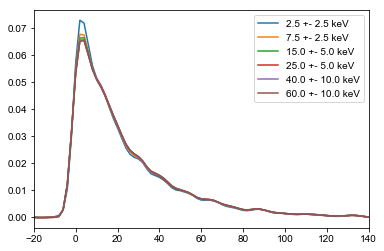

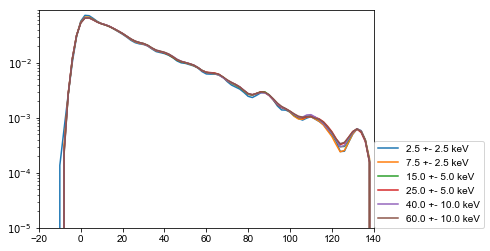

In [76]:
for wf, c, w in zip(wfs, e_bin_centers, e_widths):
    plt.plot(spe_ts, wf, label="%.1f +- %.1f keV" % (c, w))
    plt.xlim(-20, 140)
plt.legend()
plt.show()

for wf, c, w in zip(wfs, e_bin_centers, e_widths):
    plt.plot(spe_ts, wf, label="%.1f +- %.1f keV" % (c, w))
    plt.xlim(-20, 140)
plt.legend(loc=(1,0))
plt.yscale('log')
plt.ylim(1e-5, 0.09)
plt.show()

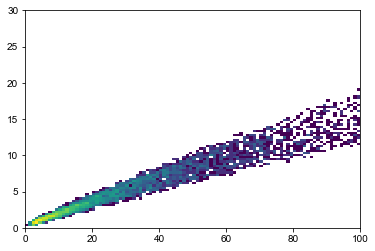

In [82]:
plt.hist2d(d['s1'], d['e_ces'], bins=100, range = ((0, 100), (0, 30)), norm=LogNorm())
plt.show()

(array([ 136.,  455.,  453.,  365.,  311.,  237.,  116.,   60.,   39.,   10.]),
 array([  3.79602885,   5.31594659,   6.83586433,   8.35578207,
          9.87569981,  11.39561755,  12.91553529,  14.43545303,
         15.95537077,  17.47528851,  18.99520624]),
 <a list of 10 Patch objects>)

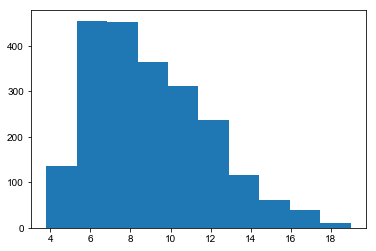

In [83]:
plt.hist(d[(d['s1'] >= 30) & (d['s1'] < 100)]['e_ces'])

## Binning

In [104]:
popt_er = {'bootstrap_trials': 250,
 'chi2': 1.2889927184130863,
 'fs': 0.17999999999999999,
 'n_photons': 2000000,
 'neglect_systematic': False,
 't1': 1.5,
 't3': 24.0,
 'tts': 2.0}

In [26]:
popt_nr = dict(
    bootstrap_trials = 250,
    #chi2                  1.27393
    dset = 'nr',
    fs = 0.22,
    n_photons = int(2e5),
    neglect_systematic = False,
    t1 = 1.5,
    t3 = 21,
    tts = 1.5,
    stored_stat = False)

In [33]:
popt_nr['s1_min'] = 50
popt_nr['s1_max'] = 60


In [107]:
# del stored_stat
stored_stat = real_s1_wv_sigma(**popt_er)

{'chi2': 1.2889927184130863, 'fs': 0.18, 't_max': 125.0, 'f_r': 0.0, 'tts': 2.0, 'eta': 0.0, 's1_max': 100, 'n_photons': 2000000, 'error_pct': 0.0, 's1_model': 'two_exp', 'tr': 15, 'stored_stat': True, 'aft': 0.28, 's1_sample': 'data', 'error_offset': 0.0001, 'dset': 'er', 'fs_r': 0.2, 'neglect_systematic': False, 's1_min': 30, 't1': 1.5, 't3': 24.0, 'neglect_statistical': False, 'bootstrap_trials': 250, 't_min': -3.5}
Reading stat error from stored_stat parameter!


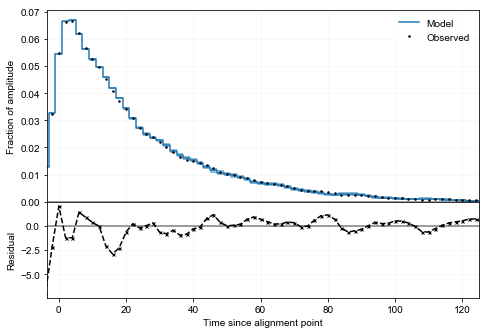

Reading stat error from stored_stat parameter!
chi2 = 0.742557


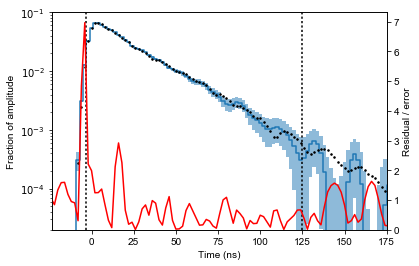

In [111]:
popt_er['t_min']= - 3.5
# popt_er
plot_model(**popt_er)


In [67]:
s1_bin_edges = np.linspace(30, 100, 8)
s1_lefts = s1_bin_edges[:-1]
s1_rights = s1_bin_edges[1:]
s1_centers = 0.5 * (s1_lefts + s1_rights)

wvs = []
wvs_sig = []
p = dict(dset = 'er')
for l, r in zip(s1_lefts, s1_rights):
    p['s1_min'] = l
    p['s1_max'] = r
    
    wv = real_s1_wv(**p)
    wvs.append(wv[0])
    wvs_sig.append('hoi')
wvs = np.array(wvs)

(0.0001, 0.1)

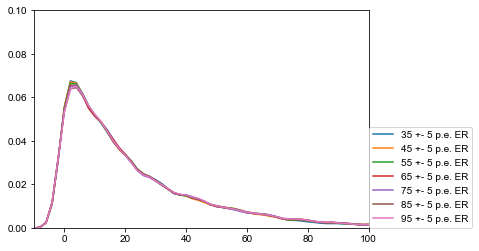

In [70]:
for wv, s1 in zip(wvs, s1_centers):
    plt.plot(spe_ts, wv, label = '%d +- 5 p.e. ER' % s1)
plt.legend(loc=(1,0))
plt.xlim(-10, 100)
plt.ylim(1e-4, 0.1)
# plt.yscale('log')

In [78]:
def select_df(**params):
    '''Select a part of the data'''
    params = get_params(params)
    df = xams_data[params['dset']]
    # Perform the first cut: s1
    df = df[(df['s1'] >= params['s1_min']) & (df['s1'] < params['s1_max'])]
    df = df['']
    return df

In [94]:
def add_g1g2_props(df, g1 = 0.1, g2 = 4.7):
    import pandas as pd
    pd.options.mode.chained_assignment = None
    df['n_g'] = df['cs1'] / g1
    df['n_e'] = df['cs2b'] / g2
    df['n_quanta'] = df['n_g'] + df['n_e']
    df['f_g'] = df['n_g'] / (df['n_quanta']) # gamma fraction
    df['e_ces'] = 13.7e-3 * (df['cs1'] / g1 + df['cs2b'] / g2)
    return df

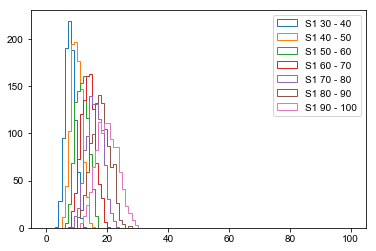

In [96]:
for l, r in zip(s1_lefts, s1_rights):
    p['dset'] = 'er'
    p['s1_min'] = l
    p['s1_max'] = r
    df = select_df(**p)
    df = add_g1g2_props(df)
    plt.hist(df['e_ces'], histtype='step', label='S1 %d - %d' % (l, r), range=(0, 100), bins=100)
plt.legend()
plt.show()

In [98]:
df = xams_data['er']
df = add_g1g2_props(df)

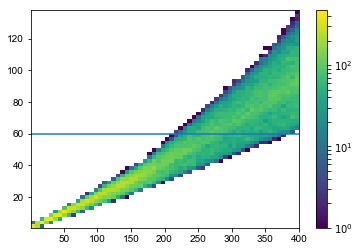

In [103]:
plt.hist2d(df['cs1'], df['e_ces'], norm = LogNorm(), bins = 60)
plt.colorbar()
plt.axhline(60)
plt.show()

In [18]:
ding = {'fs': 0.25, 't3': 22.5, 't1': 2.0, 's1_model': 'two_exp', 's1_min': 30, 'chi2': 1.5963870847563295, 's1_sample': 'data', 'neglect_systematic': False, 'eta': 0.0, 't_min': -10.0, 'bootstrap_trials': 250, 'error_pct': 0.01, 'dset': 'nr', 'tr': 15, 's1_max': 100, 'error_offset': 0.0001, 'aft': 0.28, 'f_r': 0.0, 'fs_r': 0.2, 'tts': 1.5, 't_max': 125.0, 'stored_stat': True, 'n_photons': 2000000, 'neglect_statistical': False}

{'chi2': 1.5963870847563295, 'fs': 0.25, 't_max': 125.0, 'f_r': 0.0, 'tts': 1.5, 'eta': 0.0, 's1_max': 100, 'n_photons': 2000000, 'error_pct': 0.01, 's1_model': 'two_exp', 'aft': 0.28, 'stored_stat': True, 'tr': 15, 's1_sample': 'data', 'error_offset': 0.0001, 'dset': 'nr', 'fs_r': 0.2, 'neglect_systematic': False, 's1_min': 30, 't1': 2.0, 't3': 22.5, 'neglect_statistical': False, 'bootstrap_trials': 250, 't_min': -10.0}
Reading stat error from stored_stat parameter!


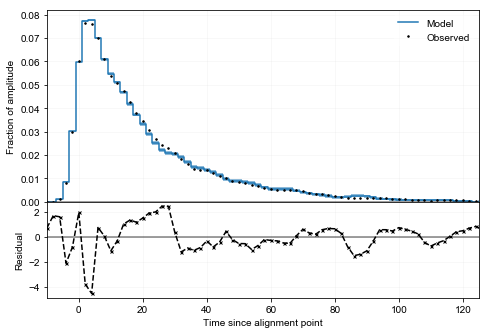

Reading stat error from stored_stat parameter!
chi2 = 1.450453


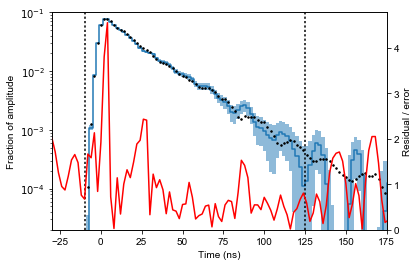

In [19]:
plot_model(**ding)

## Random

In [4]:
p = dict(stored_stat = True, bootstrap_trials = 100)

In [11]:
stored_stat = real_s1_wv_sigma(**p)

In [12]:
%%time 
[gof(**p) for _ in range(10)]

Reading stat error from stored_stat parameter!
gof=22.76022727537346, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=17.07579533296138, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=19.871134868284763, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=18.748121060190428, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=18.596141713883153, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=19.135100544486786, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=20.174187390553282, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=20.509568167803906, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=18.20133939620169, fs=0.2, t1=3.1, t3=24, tts=2.0
Reading stat error from stored_stat parameter!
gof=17.72586123121678, fs=0.2, t1=3.1,

[22.76022727537346,
 17.075795332961381,
 19.871134868284763,
 18.748121060190428,
 18.596141713883153,
 19.135100544486786,
 20.174187390553282,
 20.509568167803906,
 18.201339396201689,
 17.725861231216779]

In [10]:
%%time 
[gof(**p) for _ in range(10)]

gof=17.664585785809752, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=19.084088495698573, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=19.757313205250046, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=18.848600841706357, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=21.480413217448916, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=17.431248793369043, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=19.48322479274837, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=19.442884451449597, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.32836996651455, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=20.282734722187076, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 2min 25s, sys: 8.88 s, total: 2min 34s
Wall time: 2min 24s


[17.664585785809752,
 19.084088495698573,
 19.757313205250046,
 18.848600841706357,
 21.480413217448916,
 17.431248793369043,
 19.48322479274837,
 19.442884451449597,
 23.328369966514551,
 20.282734722187076]

## SPE error test

In [3]:
p = dict(bootstrap_trials = 25, neglect_statistical = False, include_spe_error = True, s1_min = 30, s1_max = 40, 
        # tts=0.1, fs=1, t1 = 0.01
        )

{'eta': 0.0, 'dset': 'er', 's1_sample': 'data', 't3': 24, 'include_spe_error': True, 'fs_r': 0.2, 's1_model': 'two_exp', 'tts': 2.0, 'bootstrap_trials': 25, 'neglect_systematic': False, 'spe_model': 'highres', 's1_max': 40, 's1_min': 30, 'aft': 0.28, 'neglect_statistical': False, 'tr': 15, 'n_photons': 200000, 'error_pct': 0.0, 'error_offset': 0.0001, 't1': 3.1, 't_max': 125.0, 't_min': -8.0, 'fs': 0.2, 'f_r': 0.0}


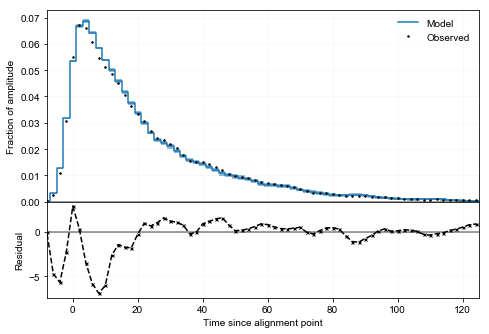

chi2 = 3.616420


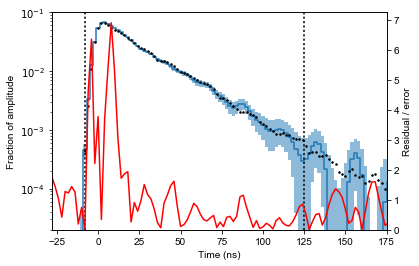

In [4]:
plot_model(**p)

The thing is... The errors of the pulses will add up, BUT since we have an oscillating function the oscillations will mostly cancel. The errors will therefore also cancel. How can we take this into account properly? You could argue that the residuals should show errors around 1? 
What is the advantage of doing it this way? Well, we put the error right where it should be: in the oscillating part of the waveform.

# Speed test...

In [6]:
%%time
[gof(neglect_systematic = True, neglect_statistic = False) for _ in range(10)]
# NOTE for .2 ns fine res.

gof=23.039344695275755, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=18.473482294720725, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=20.47309654749457, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=26.40520927467195, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=16.279834737380334, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.234135599672165, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=31.552973687572564, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=24.79875727364564, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.708762882523718, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=34.10026010275291, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 25.7 s, sys: 7.27 s, total: 32.9 s
Wall time: 22.8 s


[23.039344695275755,
 18.473482294720725,
 20.473096547494571,
 26.40520927467195,
 16.279834737380334,
 23.234135599672165,
 31.552973687572564,
 24.798757273645641,
 23.708762882523718,
 34.100260102752912]

In [7]:
%%time
[gof(neglect_systematic = False, neglect_statistic = False) for _ in range(10)]
# NOTE for .2 ns fine res.

gof=33.63188829303447, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=21.573786247034285, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=25.51042742373897, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=24.474056814268295, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=15.463038737458215, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=17.49830983889037, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=24.974749173721904, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=21.234554377515177, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=17.42762638520654, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=19.40392372684496, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 24.7 s, sys: 7.56 s, total: 32.3 s
Wall time: 22.3 s


[33.631888293034471,
 21.573786247034285,
 25.510427423738971,
 24.474056814268295,
 15.463038737458215,
 17.498309838890371,
 24.974749173721904,
 21.234554377515177,
 17.427626385206541,
 19.403923726844958]

In [5]:
%%time
[gof(neglect_systematic = True, neglect_statistic = True) for _ in range(10)]
# NOTE for .2 ns fine res.

gof=23.889841970562536, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=22.0794103827382, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=17.58391881463937, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=20.873415799243674, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=25.665230284175703, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=20.71469785321107, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=28.97382975256655, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=25.77466977288683, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=15.722848807517103, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=15.400574497432613, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 26.8 s, sys: 7.54 s, total: 34.3 s
Wall time: 24.3 s


[23.889841970562536,
 22.0794103827382,
 17.583918814639372,
 20.873415799243674,
 25.665230284175703,
 20.714697853211071,
 28.973829752566552,
 25.774669772886831,
 15.722848807517103,
 15.400574497432613]

In [5]:
%%time
[gof(neglect_systematic = True, neglect_statistic = True) for _ in range(10)]
# NOTE for .1 ns fine res.

gof=21.697756257534444, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=29.882493889971844, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.470060844211822, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=15.54366650461146, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=27.765201549651227, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=22.462747090939835, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=16.52299575277321, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=21.957353044783883, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=16.172621342462737, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=21.365545974115488, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 35.7 s, sys: 14.1 s, total: 49.7 s
Wall time: 30.9 s


[21.697756257534444,
 29.882493889971844,
 23.470060844211822,
 15.54366650461146,
 27.765201549651227,
 22.462747090939835,
 16.522995752773209,
 21.957353044783883,
 16.172621342462737,
 21.365545974115488]

In [8]:
%%time
[gof(neglect_systematic = False, neglect_statistic = False) for _ in range(10)]
# NOTE for .2 ns fine res.

gof=22.54703698368728, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=25.174292527460977, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=18.357352977271848, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.553318216610787, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=24.121476459972925, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=15.403053242025685, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=23.789225226685986, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=31.58877210324333, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=20.438138730780963, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=22.600607450706896, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 24.1 s, sys: 7.63 s, total: 31.7 s
Wall time: 21.2 s


[22.547036983687281,
 25.174292527460977,
 18.357352977271848,
 23.553318216610787,
 24.121476459972925,
 15.403053242025685,
 23.789225226685986,
 31.588772103243329,
 20.438138730780963,
 22.600607450706896]

In [20]:
%%time
[gof(**p) for _ in range(10)]

gof=33.110551747996325, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=42.541642136883674, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=47.56297040407072, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=55.863691820308304, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=40.393101901164336, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=42.152665149438604, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=40.470313831571744, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=40.93040405799156, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=48.52452329649383, fs=0.2, t1=3.1, t3=24, tts=2.0
gof=51.370353214622654, fs=0.2, t1=3.1, t3=24, tts=2.0
CPU times: user 15.5 s, sys: 1.5 s, total: 17 s
Wall time: 15.5 s


[33.110551747996325,
 42.541642136883674,
 47.562970404070718,
 55.863691820308304,
 40.393101901164336,
 42.152665149438604,
 40.470313831571744,
 40.930404057991559,
 48.524523296493832,
 51.370353214622654]

{'bootstrap_trials': 10, 'neglect_systematic': True, 'f_r': 0.0, 's1_min': 30, 'dset': 'er', 't1': 3.1, 't_min': -8.0, 'fs_r': 0.2, 'error_offset': 0.0001, 'n_photons': 200000, 't_max': 125.0, 's1_model': 'two_exp', 'tts': 2.0, 't3': 24, 'fs': 0.2, 'eta': 0.0, 's1_sample': 'data', 'neglect_statistical': True, 'tr': 15, 'spe_model': 'highres', 's1_max': 100, 'error_pct': 0.0, 'aft': 0.28}
Neglect!


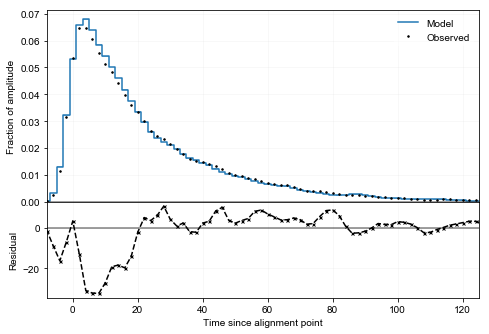

In [27]:
plot_model(plot_type = 1, neglect_systematic = True, neglect_statistical = True)

# Minimization

Let us do the following, as an example:
  * We take ER data, from 30 to 100 p.e.;
  * We take the simple model;
  * We take as errors stat. plus SPE error (0, 70, 0.00002, 0.0000, 15)
  * Make a grid of the four parameters and scan it, presumably at low stats
  

In [14]:
p = dict(
    s1_min = 30,
    s1_max = 100,
    neglect_systematic = True,
    neglect_statistic = False,
    bootstrap_trials = 10,
    t_max = 125,
    t_min = -10,
    n_photons = int(1e5),
)

In [15]:
x = produce_settings_dicts(['t3', 'fs', 't1', 'tts'], [22, 0.16, 1.0, 1.0], [26, 0.22, 3, 2.5],
                           [0.5, 0.01, 0.25, 0.25], 100, **p)

Loaded 3969 settings.


In [19]:
bla = """test{insert}"""

In [20]:
for i, fn in enumerate(fns):
    with open('process_%03d.py', 'w') as f:
        f.write(bla.format(insert='hoi'))

In [16]:
fns = dump_settings_pickles(x, 'pickles', 'bla')

Dumping done.


In [17]:
fns

['pickles/bla_000.pickle',
 'pickles/bla_001.pickle',
 'pickles/bla_002.pickle',
 'pickles/bla_003.pickle',
 'pickles/bla_004.pickle',
 'pickles/bla_005.pickle',
 'pickles/bla_006.pickle',
 'pickles/bla_007.pickle',
 'pickles/bla_008.pickle',
 'pickles/bla_009.pickle',
 'pickles/bla_010.pickle',
 'pickles/bla_011.pickle',
 'pickles/bla_012.pickle',
 'pickles/bla_013.pickle',
 'pickles/bla_014.pickle',
 'pickles/bla_015.pickle',
 'pickles/bla_016.pickle',
 'pickles/bla_017.pickle',
 'pickles/bla_018.pickle',
 'pickles/bla_019.pickle',
 'pickles/bla_020.pickle',
 'pickles/bla_021.pickle',
 'pickles/bla_022.pickle',
 'pickles/bla_023.pickle',
 'pickles/bla_024.pickle',
 'pickles/bla_025.pickle',
 'pickles/bla_026.pickle',
 'pickles/bla_027.pickle',
 'pickles/bla_028.pickle',
 'pickles/bla_029.pickle',
 'pickles/bla_030.pickle',
 'pickles/bla_031.pickle',
 'pickles/bla_032.pickle',
 'pickles/bla_033.pickle',
 'pickles/bla_034.pickle',
 'pickles/bla_035.pickle',
 'pickles/bla_036.pickle',
 

In [65]:
%%time
x = process_the_pickle('pickles/er_two_exp_000.pickle')

gof=48.40580091213237, fs=0.16, t1=1.0, t3=22.0, tts=1.0
gof=32.640734955821266, fs=0.16, t1=1.0, t3=22.0, tts=1.25
gof=24.252867781541845, fs=0.16, t1=1.0, t3=22.0, tts=1.5
gof=18.402298944196886, fs=0.16, t1=1.0, t3=22.0, tts=1.75
gof=17.651235220445958, fs=0.16, t1=1.0, t3=22.0, tts=2.0
gof=16.878255593478656, fs=0.16, t1=1.0, t3=22.0, tts=2.25
gof=37.458315406785474, fs=0.16, t1=1.0, t3=22.0, tts=2.5
gof=58.2994165772285, fs=0.16, t1=1.25, t3=22.0, tts=1.0
gof=32.47663922768104, fs=0.16, t1=1.25, t3=22.0, tts=1.25
gof=20.39100994296635, fs=0.16, t1=1.25, t3=22.0, tts=1.5
gof=14.06813658115836, fs=0.16, t1=1.25, t3=22.0, tts=1.75
gof=15.086372021321846, fs=0.16, t1=1.25, t3=22.0, tts=2.0
gof=21.0589139068822, fs=0.16, t1=1.25, t3=22.0, tts=2.25
gof=30.561175540169575, fs=0.16, t1=1.25, t3=22.0, tts=2.5
gof=50.550709643875464, fs=0.16, t1=1.5, t3=22.0, tts=1.0
gof=39.523172343585934, fs=0.16, t1=1.5, t3=22.0, tts=1.25
gof=25.857207642664537, fs=0.16, t1=1.5, t3=22.0, tts=1.5
gof=17.2

In [ ]:
os.listdir('pickles')

In [12]:
%%time
for i in range(34):
    print('================== Iteration %d =========' % i)
    fn = 'pickles/er_two_exp_%03d.pickle' % i
    process_the_pickle(fn)

================== Iteration 0 =======process_the_pickle==
gof=60.815384744497294, fs=0.16, t1=1.0, t3=22.0, tts=1.0
gof=35.653775484813174, fs=0.16, t1=1.0, t3=22.0, tts=1.25
gof=23.036449557838615, fs=0.16, t1=1.0, t3=22.0, tts=1.5
gof=17.220974459223765, fs=0.16, t1=1.0, t3=22.0, tts=1.75
gof=11.401147835487148, fs=0.16, t1=1.0, t3=22.0, tts=2.0
gof=18.965376753904554, fs=0.16, t1=1.0, t3=22.0, tts=2.25
gof=34.8031882907846, fs=0.16, t1=1.0, t3=22.0, tts=2.5
gof=56.6363425896933, fs=0.16, t1=1.25, t3=22.0, tts=1.0
gof=34.74533060486183, fs=0.16, t1=1.25, t3=22.0, tts=1.25
gof=25.62228139365591, fs=0.16, t1=1.25, t3=22.0, tts=1.5
gof=12.520666188658705, fs=0.16, t1=1.25, t3=22.0, tts=1.75
gof=16.46620682337719, fs=0.16, t1=1.25, t3=22.0, tts=2.0
gof=19.737187979143048, fs=0.16, t1=1.25, t3=22.0, tts=2.25
gof=33.7629778597256, fs=0.16, t1=1.25, t3=22.0, tts=2.5
gof=45.8840059972178, fs=0.16, t1=1.5, t3=22.0, tts=1.0
gof=35.16146225025177, fs=0.16, t1=1.5, t3=22.0, tts=1.25
gof=30.8780

In [13]:
%%time
for i in [34, 35, 36, 37, 38]:
    print('================== Iteration %d =========' % i)
    fn = 'pickles/er_two_exp_%03d.pickle' % i
    process_the_pickle(fn)

================== Iteration 34 =========
gof=120.21373678117173, fs=0.22, t1=3.0, t3=22.0, tts=2.5
gof=235.72763035583978, fs=0.22, t1=1.0, t3=22.5, tts=1.0
gof=191.2659316094191, fs=0.22, t1=1.0, t3=22.5, tts=1.25
gof=196.76683252947376, fs=0.22, t1=1.0, t3=22.5, tts=1.5
gof=113.82936336027164, fs=0.22, t1=1.0, t3=22.5, tts=1.75
gof=49.86796062471547, fs=0.22, t1=1.0, t3=22.5, tts=2.0
gof=54.37301176417123, fs=0.22, t1=1.0, t3=22.5, tts=2.25
gof=43.417991809655305, fs=0.22, t1=1.0, t3=22.5, tts=2.5
gof=230.9197167427195, fs=0.22, t1=1.25, t3=22.5, tts=1.0
gof=124.63037111256618, fs=0.22, t1=1.25, t3=22.5, tts=1.25
gof=102.04878802968372, fs=0.22, t1=1.25, t3=22.5, tts=1.5
gof=74.58001561173533, fs=0.22, t1=1.25, t3=22.5, tts=1.75
gof=81.7754047494511, fs=0.22, t1=1.25, t3=22.5, tts=2.0
gof=80.10524197238888, fs=0.22, t1=1.25, t3=22.5, tts=2.25
gof=52.58564293341738, fs=0.22, t1=1.25, t3=22.5, tts=2.5
gof=200.25902548934408, fs=0.22, t1=1.5, t3=22.5, tts=1.0
gof=179.28778479562538, fs

In [ ]:
for fn in os.listdir('pickles'):
    fn = os.path.join('pickles', fn)

In [20]:
import pandas as pd

# Stability test

In [51]:
opt_p

{'fs': 0.16911347641690666,
 'neglect_systematic': True,
 's1_max': 40,
 's1_min': 30,
 't1': 1.3621996161327348,
 't3': 24.050687484213853,
 't_max': 80,
 't_min': -10,
 'tts': 1.6212773202902226}

In [60]:
ding = {}
for bss in [3, 10, 25, 50]:
    print(bss)
    opt_p['bootstrap_trials'] = bss
    ding[bss] = [gof(verbose = False, **opt_p) for _ in range(30)]

3
10
25


In [65]:
for bss in [50]:
    print(bss)
    opt_p['bootstrap_trials'] = bss
    ding[bss] = [gof(verbose = False, **opt_p) for _ in range(30)]

50


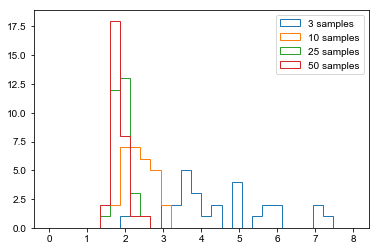

In [66]:
for bss in [3,10, 25, 50]:
    plt.hist(ding[bss], histtype='step', label='%d samples' % bss, range=(0, 8), bins=30)
plt.legend()

In [67]:
ding2 = {}
opt_p['bootstrap_trials'] = 25
for n_photons in (1e4, 2e5, 5e5):
    print(n_photons)
    opt_p['n_photons'] = int(n_photons)
    ding2[n_photons] = [gof(verbose = False, **opt_p) for _ in range(20)]

10000.0
200000.0
500000.0


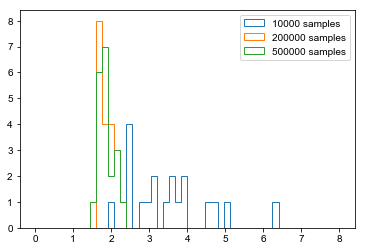

In [70]:
for nph in (1e4, 2e5, 5e5):
    plt.hist(ding2[nph], histtype='step', label='%d samples' % nph, range=(0, 8), bins=50)
plt.legend()

In [4]:
opt_p = {'fs': 0.16911347641690666,
 'neglect_systematic': True,
 's1_max': 40,
 's1_min': 30,
 't1': 1.3621996161327348,
 't3': 24.050687484213853,
 't_max': 80,
 't_min': -10,
 'tts': 1.6212773202902226,
 'bootstrap_trials' : 25}

In [9]:
bla = [gof(verbose=False, **opt_p) for _ in range(10)]

In [15]:
def minimize_it(param_names, starting_values, direc, **params):
    optresult = optimize.minimize(
        lambda x: gof(**merge_two_dicts(params, {par : x[i] for i, par in enumerate(param_names)})),
        starting_values,
        options=dict(maxfev=1000, direc=direc),
        method='Powell',
    )
    return optresult

In [16]:
minimize_it(['t3'], [opt_p['t3']], np.array([1]), **opt_p)

gof=2.4671596929209647, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=2.6958386441319475, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=4.532235495164012, fs=0.16911347641690666, t1=1.3621996161327348, t3=25.050687484213853, tts=1.6212773202902226
gof=6.324388699954039, fs=0.16911347641690666, t1=1.3621996161327348, t3=22.43265348421385, tts=1.6212773202902226
gof=3.2514406643569482, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=4.1107062630389715, fs=0.16911347641690666, t1=1.3621996161327348, t3=23.432653509369853, tts=1.6212773202902226
gof=2.449106734314883, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.43265348421385, tts=1.6212773202902226
gof=2.6675101633649065, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.668721459057853, tts=1.6212773202902226
gof=2.4872450511738773, fs=0.16911347641690666, t1=1.3621996161327348

   direc: array([ 1.])
     fun: 2.0090494610794991
 message: 'Optimization terminated successfully.'
    nfev: 45
     nit: 3
  status: 0
 success: True
       x: array(24.582283412447445)

In [19]:
X = [minimize_it(['t3'], [opt_p['t3']], np.array([0.5]), **opt_p).x for x in range(5)]

gof=1.8658695108622587, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=2.793310044249695, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=2.126646522140031, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.550687484213853, tts=1.6212773202902226
gof=4.985344034958938, fs=0.16911347641690666, t1=1.3621996161327348, t3=25.359704484213854, tts=1.6212773202902226
gof=2.712620371325811, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.550687484213853, tts=1.6212773202902226
gof=2.9393097358589837, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.85970447163585, tts=1.6212773202902226
gof=2.8693948928347317, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.359704484213854, tts=1.6212773202902226
gof=2.639768944338601, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.58721607350775, tts=1.6212773202902226
gof=4.198769704613051, fs=0.16911347641690666, t1=1.3621996161327348, t

In [20]:
X

[array(24.58721607350775),
 array(24.445978547717353),
 array(24.593959097363047),
 array(24.436664304775896),
 array(24.85970447163585)]

In [21]:
opt_p['fs']

0.16911347641690666

In [23]:
Y = [minimize_it(['t3', 'fs'], [opt_p['t3'], opt_p['fs']], np.array([0.5, 0.02]), **opt_p) for x in range(5)]

gof=1.9243053698190544, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=2.9807082357190104, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=1339.0642472038696, fs=0.6691134764169067, t1=1.3621996161327348, t3=24.550687484213853, tts=1.6212773202902226
gof=75.98004310474083, fs=0, t1=1.3621996161327348, t3=23.241670484213852, tts=1.6212773202902226
gof=2.1340443767750985, fs=0.16911347641690666, t1=1.3621996161327348, t3=24.050687484213853, tts=1.6212773202902226
gof=62.042347535621225, fs=0, t1=1.3621996161327348, t3=23.74167049679185, tts=1.6212773202902226
gof=181.41519750919466, fs=0.3600964764169067, t1=1.3621996161327348, t3=24.241670484213852, tts=1.6212773202902226
gof=33.95558116457656, fs=0.05739768989881966, t1=1.3621996161327348, t3=23.938971697695766, tts=1.6212773202902226
gof=18.98742460968362, fs=0.24206248899490668, t1=1.3621996161327348, t3=24.123636496791853, tts=1.621277

ValueError: setting an array element with a sequence.

### Recombination 2

In [4]:
p = dict(
    s1_model = 'recombination'
)

{'tts': 2.0, 'spe_model': 'expnorm', 'neglect_statistical': False, 's1_min': 30, 'tr': 15, 's1_model': 'recombination', 'eta': 0.0, 'fs': 0.2, 'neglect_systematic': True, 'fs_r': 0.2, 's1_max': 100, 's1_sample': 'data', 'n_photons': 200000, 'error_pct': 0.0, 't3': 24, 'dset': 'er', 'error_offset': 0.0001, 't_min': -8.0, 'aft': 0.5, 't_max': 200.0, 'f_r': 0.0, 't1': 3.1}


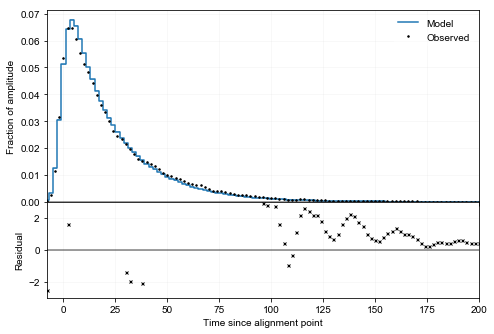

chi2 = 47.078483


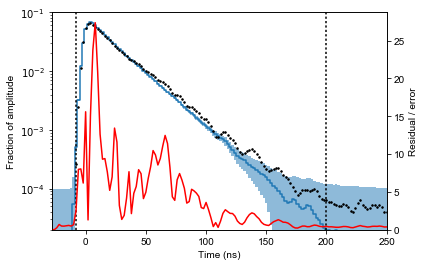

In [5]:
plot_model(**p)

In [7]:
minimize_it(['fs', 't3'], [0.2, 24.], **p)

gof=43.598244775734535, fs=0.2, t1=3.1, t3=24.0, tts=2.0
gof=40.543779419594635, fs=0.2, t1=3.1, t3=24.0, tts=2.0
gof=7335.058920303647, fs=1, t1=3.1, t3=24.0, tts=2.0
gof=173.57659826020407, fs=0, t1=3.1, t3=24.0, tts=2.0
gof=42.0790009417838, fs=0.2, t1=3.1, t3=24.0, tts=2.0
gof=209.66489705577433, fs=0, t1=3.1, t3=24.0, tts=2.0
gof=1580.340484166692, fs=0.581966, t1=3.1, t3=24.0, tts=2.0
gof=226.1881633063835, fs=0, t1=3.1, t3=24.0, tts=2.0
gof=269.78326308833874, fs=0.34589802515600004, t1=3.1, t3=24.0, tts=2.0
gof=79.00483393055576, fs=0.09401401696707583, t1=3.1, t3=24.0, tts=2.0
gof=100.22731479938183, fs=0.2557280850767367, t1=3.1, t3=24.0, tts=2.0
gof=33.194866004110814, fs=0.16724711461657396, t1=3.1, t3=24.0, tts=2.0
gof=36.691766291997325, fs=0.1675949323848563, t1=3.1, t3=24.0, tts=2.0
gof=46.96446350588663, fs=0.13927456123978577, t1=3.1, t3=24.0, tts=2.0
gof=39.62124049900278, fs=0.15656255029345567, t1=3.1, t3=24.0, tts=2.0
gof=36.04742468733804, fs=0.1622162070301732, 

   direc: array([[ 1.,  0.],
       [ 0.,  1.]])
     fun: 11.5954355427293
 message: 'Optimization terminated successfully.'
    nfev: 97
     nit: 3
  status: 0
 success: True
       x: array([  0.20658024,  26.98509037])

In [16]:
p = dict(
    dset = 'er_0',
    s1_model = 'recombination2',
    t3 = 24.,
    eta = 0.5,
    f_r = 0.5
    
)

{'tts': 2.0, 'spe_model': 'expnorm', 'neglect_statistical': False, 's1_min': 30, 'tr': 15, 's1_model': 'recombination2', 'eta': 0.5, 'fs': 0.2, 'neglect_systematic': True, 'fs_r': 0.2, 's1_max': 100, 's1_sample': 'data', 'n_photons': 200000, 'error_pct': 0.0, 't3': 24.0, 'dset': 'er_0', 'error_offset': 0.0001, 't_min': -8.0, 'aft': 0.5, 't_max': 200.0, 'f_r': 0.5, 't1': 3.1}


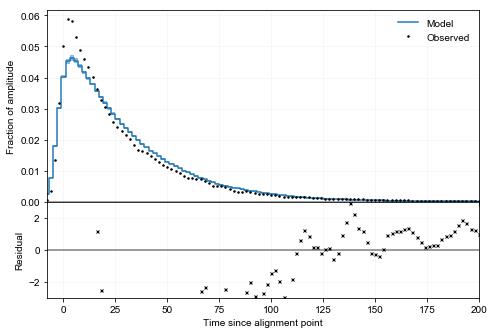

chi2 = 38.352329


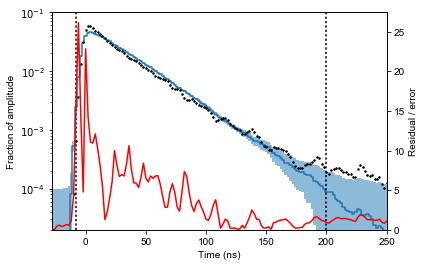

In [17]:
plot_model(**p)

{'tts': 2.0, 'spe_model': 'expnorm', 'neglect_statistical': False, 's1_min': 30, 'tr': 15, 's1_model': 'recombination2', 'eta': 0.0, 'fs': 0.2, 'neglect_systematic': True, 'fs_r': 0.2, 's1_max': 100, 's1_sample': 'data', 'n_photons': 200000, 'error_pct': 0.0, 't3': 24.0, 'dset': 'er_0', 'error_offset': 0.0001, 't_min': -8.0, 'aft': 0.5, 't_max': 200.0, 'f_r': 0.5, 't1': 3.1}


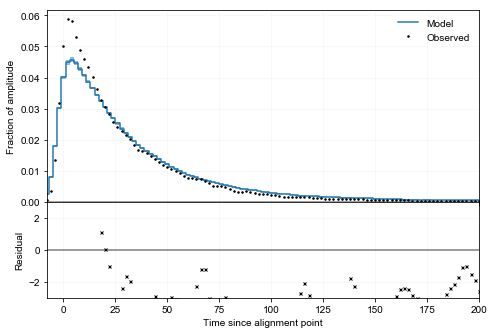

chi2 = 41.570871


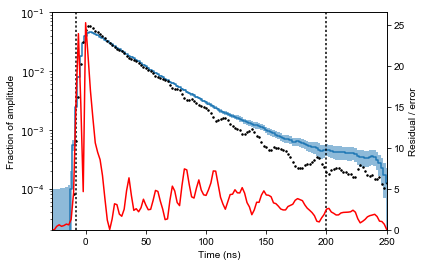

In [18]:
p['eta'] = 0.0
plot_model(**p)

In [14]:
p = opt_p

In [120]:
dump_settings_pickles(x, '.', 'bla')

Dumping done.


In [123]:
process_the_pickle('bla_000.pickle')

gof=21.168969381991523, fs=0.18, t1=3.1, t3=22.0, tts=2.0
gof=21.748224798124767, fs=0.18, t1=3.1, t3=22.0, tts=2.0
gof=29.24551537607638, fs=0.18, t1=3.1, t3=23.0, tts=2.0
gof=30.394114629764367, fs=0.18, t1=3.1, t3=23.0, tts=2.0
gof=37.57430096147898, fs=0.18, t1=3.1, t3=24.0, tts=2.0
gof=33.265457871509724, fs=0.18, t1=3.1, t3=24.0, tts=2.0
gof=57.92486860742699, fs=0.18, t1=3.1, t3=25.0, tts=2.0
gof=38.69855664394244, fs=0.18, t1=3.1, t3=25.0, tts=2.0
gof=50.96438291619896, fs=0.18, t1=3.1, t3=26.0, tts=2.0
gof=58.66495957560209, fs=0.18, t1=3.1, t3=26.0, tts=2.0
Done


In [124]:
bla = pickle.load(open('bla_000.pickle', 'rb'))

In [125]:
bla

array([ {'f_r': 0.5, 'bla': 0.0, 't3': 22.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 21.168969381991523},
       {'f_r': 0.5, 'bla': 1.0, 't3': 22.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 21.748224798124767},
       {'f_r': 0.5, 'bla': 0.0, 't3': 23.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 29.24551537607638},
       {'f_r': 0.5, 'bla': 1.0, 't3': 23.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 30.394114629764367},
       {'f_r': 0.5, 'bla': 0.0, 't3': 24.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 37.574300961478983},
       {'f_r': 0.5, 'bla': 1.0, 't3': 24.0, 'dset': 'er_0', 'eta': 0.0, 's1_model': 'recombination2', 'fs': 0.17999999999999999, 'chi2': 33.265457871509724},
       {'f_r': 0.5, 'bla': 0.0, 't3': 25.0, 'dset': 